# Корреляция — статистическая связь двух и более переменных. При изменении значения одной из переменных происходит закономерное изменение другой или других величин

# Понимание корреляции приводит нас к понятию мультиколлинеарности — такой сильной зависимости переменных друг от друга, что она затрудняет анализ и оценку будущей модели машинного обучения.
![](Data/img.png)

# Корреляция Пирсона

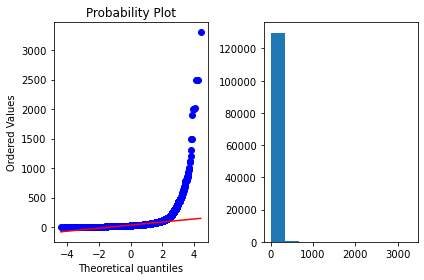

In [4]:
import matplotlib.pyplot as plt # библиотека визуализации
import pandas as pd
import plotly.express as px
from scipy import stats # библиотека для расчетов
df = pd.read_csv('Data/wine_cleared.csv')
plt.subplot(1, 2, 1) # задаем сетку рисунка количество строк и столбцов
stats.probplot(df['price'], plot=plt) # qq plot

plt.subplot(1, 2, 2) # располагаем второй рисунок рядом
plt.hist(df['price']) # гистограмма распределения признака

plt.tight_layout() # чтобы графики не наезжали другу на друга, используем tight_layout

plt.show() # просмотр графика

Мы видим, что цена распределена не нормально -> нужно использовать не метод Пирсона для определения корреляции

# Ранговые корреляции
Ранговая корреляция — это вид корреляции, отражающий отношения переменных, упорядоченных по возрастанию их значения. Ранги — это порядковые номера единиц совокупности в упорядоченном (ранжированном) ряду. Если проранжировать совокупность по двум признакам, связь между которыми изучается, то полное совпадение рангов означает максимально тесную прямую связь, а полная противоположность рангов — максимально тесную обратную связь.


In [5]:
df.corr(method='spearman')

,points,price
points,1.000000,0.581095
price,0.581095,1.000000


In [6]:
df.corr(method='kendall')

,points,price
points,1.000000,0.433498
price,0.433498,1.000000


Корреляции Спирмена и Кендалла очень похожи. Чтобы понять их различия, необходимо глубокое погружение в их математическую природу. Однако в среднем корреляция Кендала выдаёт меньшие значения коэффициента корреляции, чем корреляция Спирмена.

В нашем случае корреляционный анализ показал нам явную связь цены за бутылку вина с её рейтингом. Она не является такой сильной связью, чтобы вызывать мультиколлинеарность. Также мы по-прежнему не можем сказать, что цена и рейтинг связаны напрямую, ведь корреляция не даёт нам причинно-следственных связей. Возможно, есть третья переменная, влияющая на эти оба признака.

In [8]:
from sklearn.metrics import matthews_corrcoef # для бинарных признаков

In [9]:
x = [+1, -1, +1, +1] # список значений признака х
y = [+1, +1, +1, -1] # список значений признака y

matthews_corrcoef(x, y) # рассчитаем коэффициент корреляции Мэтьюса

-0.3333333333333333